# Assignment 1: Discrete time models
## Yoav Ram

In [41]:
import random

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_context('notebook')
colors = sns.color_palette('Set1', 3)
sns.set_palette('Set1')

# Exercise 1

In this exercise we'll model the spread of an infectious disease that spreads through the environment (e.g. air or water) rather than by contact with an infected person.

It would get really overwhelming if you had to ask every person at *every point in time*: "Are you sick yet? Did you get better yet?".
It makes more sense to monitor individuals' states on a *discrete basis* rather than continuously, for example, *once a day*. 

Imagine that there's a 10% *infection rate* and a 20% *recovery rate*.
That implies that *susceptible* people have a 10% chance to transition to the *infected* state, and *infected* people have 20% chance to transition to the *recovered* state between successive timesteps.
100% of those *recovered* will stay *recovered* (i.e. people who are recovered cannot become susceptible or infected again).
In general, we will call the infection rate $\alpha$ and the recovery rate $\beta$.

This is a very simple SIR model, where $S$ stands for *susceptible*, $I$ stands for *infected*, and $R$ stands for *recovered*.

Say that you start with a population of 100 people, and only 1 person is infected (the rest are susceptible).
That means your "initial state" is $S=99, I=1, R=0$, i.e. 99 are susceptible, 1 is infected, and 0 are recovered.

In [42]:
S = 99 ###
I = 1 ###
R = 0 ###

Implement a function called `step(SIR, α, β)` that given the current state `SIR=(S, I, R)` and the parameters $\alpha$ and $\beta$, randomly generates the next state.

Think: how would you implement the random draws?

In [43]:
def step(SIR, α=0.1, β=0.2): ###
    
    
    

step([50, 50, 0]) ### this is a stochastic function so it won't always give the same result

(47, 44, 9)

Now implement a function called `simulation(SIR0, α, β, days)` that given an initial state `SIR0=(S0, I0, R0)`, parameters $\alpha$ and $\beta$, and the number of days $days$ to run the simulation, simulates the dynamics and returns a vector `SIR` in which the value at index `t, j` gives state `j` at day `t` (`j` being 0 for $S$, 1 for $I$, and for $R$). 

Note that you should call `step` from `simulation`.

Think: What is the type of the returned value? How many dimensions does it have?

In [44]:
def simulation(SIR0, α=0.1, β=0.2, days=30): ###
    
    
    
print(simulation([100, 0, 0], 0.1, 0.2, 10)) ###

[[100.   0.   0.]
 [ 96.   4.   0.]
 [ 86.  11.   3.]
 [ 77.  18.   5.]
 [ 68.  25.   7.]
 [ 66.  22.  12.]
 [ 60.  25.  15.]
 [ 57.  21.  22.]
 [ 49.  26.  25.]
 [ 43.  25.  32.]]


Finally, run and plot the dynamics for 90 days, starting with 100 susceptibles, and $\alpha=0.1, \beta=0.2$.

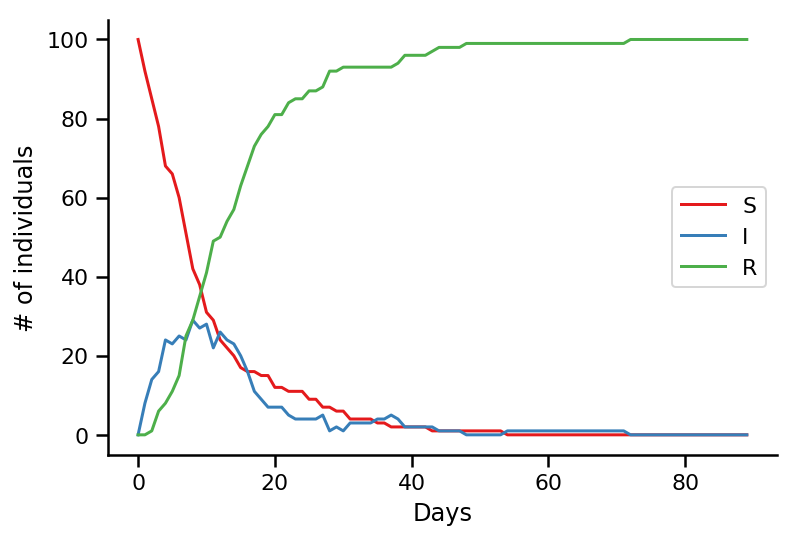

# Exercise 2

In this exercise we want to estimate $T_{I}$ the time until at least 50 % of the population has already become infected (and possibly recoved) and $T_{R}$ the time until 50% of the population has recovered.

Re-implementing, when neccessary, the functions `step` and `simulation` so that you can run multiple simulations in one function call; this would require adding a new parameter for the number of replications (`reps`).

Think: what kind of an `assert` statement would be a good test of the modified functions?

Then plot the dynamics of multiple simulations.

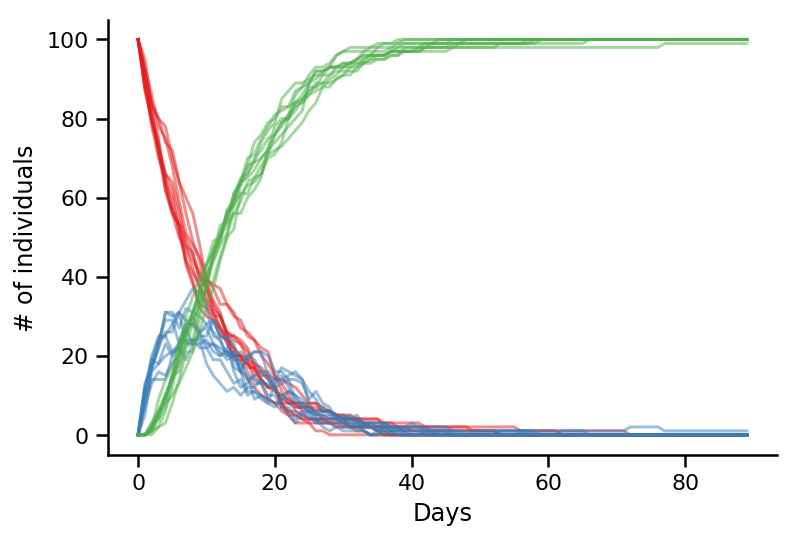

Re-create the previous plot but add lines for the average dynamics -- averaging across replications for each type and day.

Use at least 100 replications for this plot.

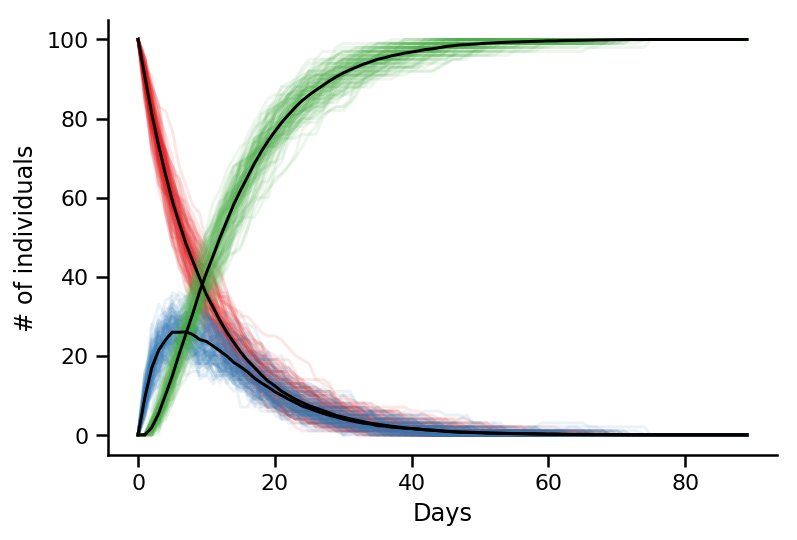

Now print the $T_{I}$ the first day at which at least 50% of the *average* population was already infected and $T_{R}$ the first day at which at least 50% of the *average* population is recovered.

Remember: the calculation should not assume a specific population size (i.e. 100 people).

In [50]:



print('T_I = ', T_I) ###
print('T_R = ', T_R) ###

T_I =  7
T_R =  13


Repeat the previous plot (dynamics + average) and add vertical lines for $T_{I}$ and $T_{R}$ (using `plt.axvline`).
Zoom in to the first 30 days and also add a horizontal line at 50% (using `plt.axhline`).

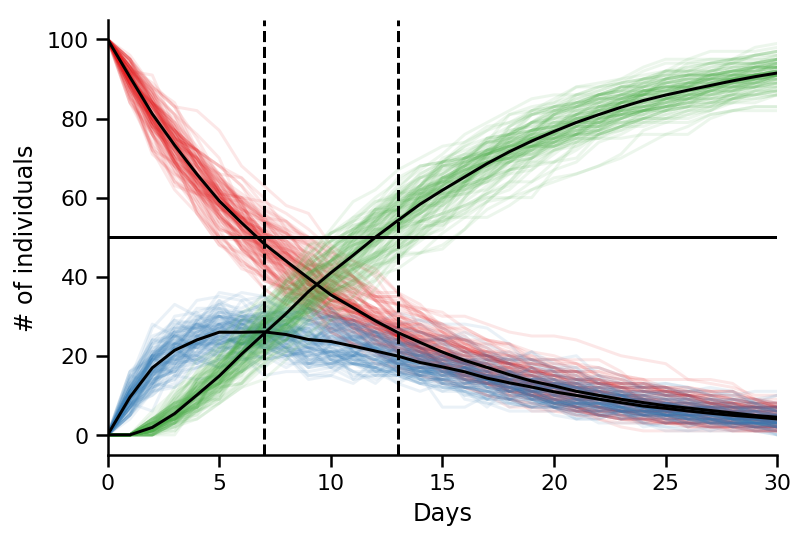

# Exercise 3

Now we change our focus to a disease that is transmitted by contact.

Therefore, the probability for a susceptible individual to become infected depends on the frequency of infected individuals, $I/N$ where $N=S+I+R$, and the infection rate is therefore $\alpha I/N$ instead of just $\alpha$.
The recovery rate does not change.

Implement `step` and/or `simulation` accordingly to find $T_{I}$ and $T_{R}$ for this disease.

You will also find that the $\alpha$ and $\beta$ parameters we used before do not allow the disease to spread (which is great!); find some parameters that do allow the disease to spread within a reasonable time scale (i.e. $T_R<365$, that is, less than a year).
Because you will use your own $\alpha$ and $\beta$ parameters your results ($T_I$, $T_R$ and plot) will differ from below.

In [ ]:
α =  # please insert a value here
β =  # please insert a value here
print('α =', α) ###
print('β =', β) ###

In [33]:



print('T_I = ', T_I) ###
print('T_R = ', T_R) ###

T_I =  28
T_R =  103


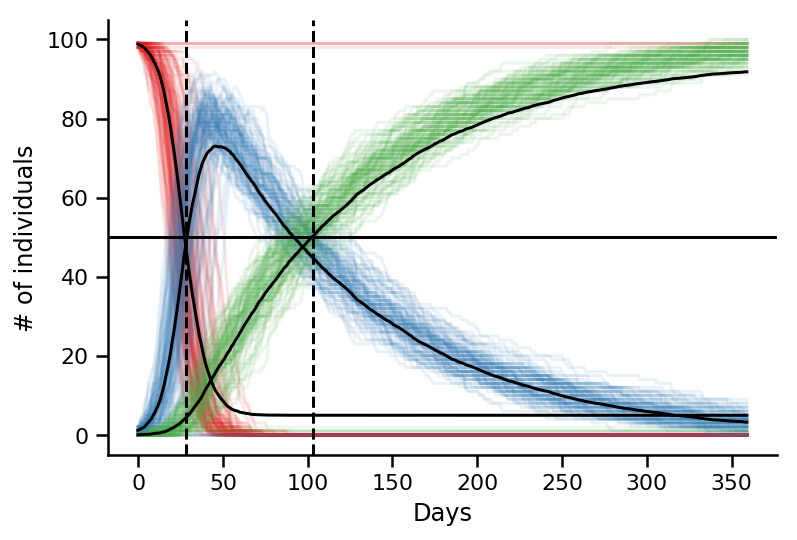

**End of assignment**